## Bootstrapping & Resampling

Sample mean is 875.00 ms


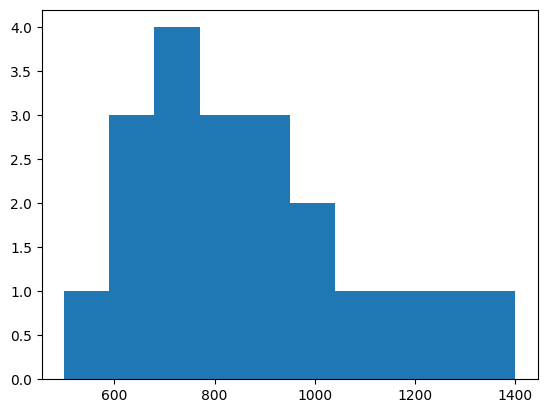

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

RTs_sample = np.array([500,650,650,750,1200,800,650,1000,750,1400,700,900,900,1300,850,950,750,850,1050,900])

print(f"Sample mean is {np.mean(RTs_sample):.2f} ms")

plt.hist(RTs_sample)
plt.show()

In [3]:
np.random.seed(9040)
nboot = 10000
RTs_boot_means = np.zeros(nboot)
N = len(RTs_sample)
for i in tqdm(range(nboot), unit=" bootstraps "):
    RTs_boot_sample = np.random.choice(RTs_sample, size=N, replace=True)
    RTs_boot_means[i] = np.mean(RTs_boot_sample)

100%|██████████| 10000/10000 [00:00<00:00, 115094.38 bootstraps /s]


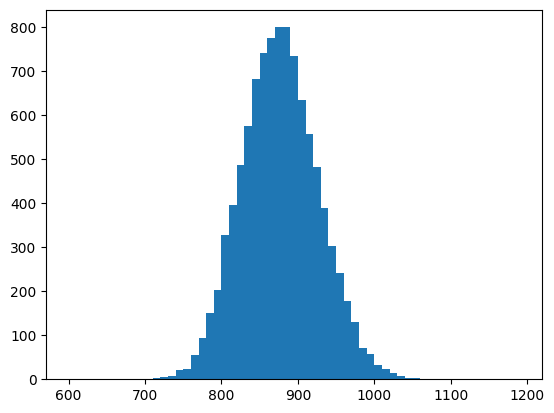

In [4]:
plt.hist(RTs_boot_means, bins=np.array(np.arange(600,1200,10)))
plt.show()

In [5]:
RTs_boot_means_mean = np.mean(RTs_boot_means)
print(f"mean of bootstrap sample means is {RTs_boot_means_mean:.2f}")

mean of bootstrap sample means is 875.56


In [6]:
RTs_boot_means_sorted = np.sort(RTs_boot_means)
RTs_boot_means_95CI = RTs_boot_means_sorted[[250,9750]]
print(f"95% confidence interval for the mean of the population is ({RTs_boot_means_95CI[0]:.1f}, {RTs_boot_means_95CI[1]:.1f})")

95% confidence interval for the mean of the population is (782.5, 975.0)


In [7]:
import scipy as sp
np.random.seed(9040)
boot_out = sp.stats.bootstrap([RTs_sample], np.mean, n_resamples=10000, method='percentile')
ci95 = boot_out.confidence_interval
print(f"95% confidence interval for the mean of the population is ({ci95[0]:.1f}, {ci95[1]:.1f})")

95% confidence interval for the mean of the population is (782.5, 975.0)


In [8]:
# Resampling

In [9]:
np.random.seed(9040)
y1 = np.random.normal(0.5, 1, 15) # mean = 0.5, sd = 1
y2 = np.random.normal(0.0, 1, 15) # mean = 0.0, sd = 1
print(f"The mean of the first sample is {np.mean(y1):.3f}")
print(f"The mean of the second sample is {np.mean(y2):.3f}")

The mean of the first sample is 0.684
The mean of the second sample is -0.172


In [10]:
import scipy as sp
out = sp.stats.ttest_ind(y1, y2, alternative='greater') # one-tailed t-test
print(f"The t-statistic is {out.statistic:.3f}")
print(f"The p-value is {out.pvalue:.3f}")

The t-statistic is 2.628
The p-value is 0.007


In [11]:
meandiff_obs = np.mean(y1) - np.mean(y2)
print(f"The observed difference between means is {meandiff_obs:.3f}")

The observed difference between means is 0.856


In [12]:
np.random.seed(9040)
nboot = 10000
meandiffs_sim = np.zeros(nboot)
N1 = len(y1)
N2 = len(y2)
pooled = np.concatenate((y1,y2)) # put both samples in one big array
for i in range(nboot):
    np.random.shuffle(pooled) # shuffle the data
    y1_sim = pooled[:N1] # take the first N1 elements as the first sample
    y2_sim = pooled[N1:] # take the last N2 elements as the second sample
    meandiffs_sim[i] = np.mean(y1_sim) - np.mean(y2_sim) # compute the difference between means

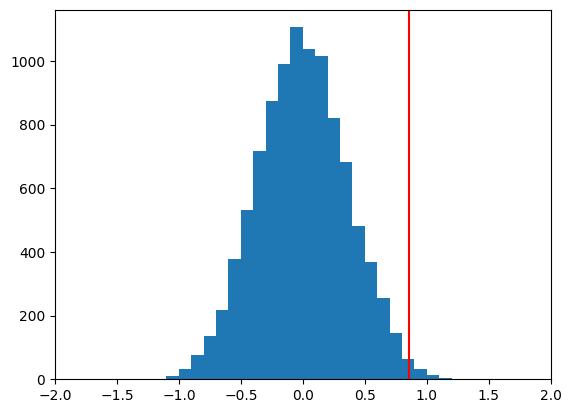

In [13]:
plt.hist(meandiffs_sim, bins=np.array(np.arange(-2,2,.1)))
plt.axvline(x=meandiff_obs, color="red")
plt.xlim(-2,2)
plt.show()

In [14]:
pval = np.sum(meandiffs_sim >= meandiff_obs) / nboot # one-tailed test
print(f"The p-value is {pval:.3f}")

The p-value is 0.007


In [15]:
def mystat(x,y):
    return np.mean(x)-np.mean(y)

statistic=0.856, p=0.007


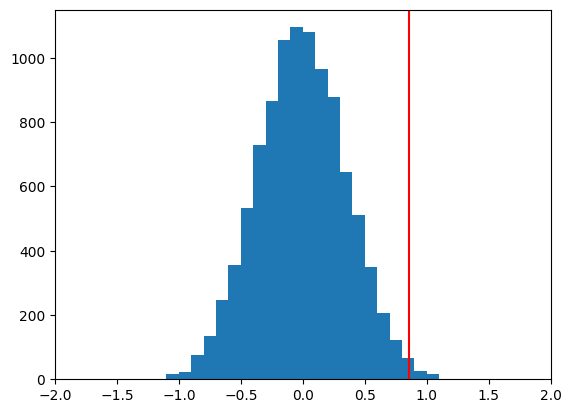

In [16]:
results = sp.stats.permutation_test(data=[y1,y2], statistic=mystat, n_resamples=10000, alternative="greater")
print(f"statistic={results.statistic:.3f}, p={results.pvalue:.3f}")
plt.hist(results.null_distribution, bins=np.array(np.arange(-2,2,.1)))
plt.axvline(results.statistic, color="red")
plt.xlim(-2,2)
plt.show()

## Cross-Validation

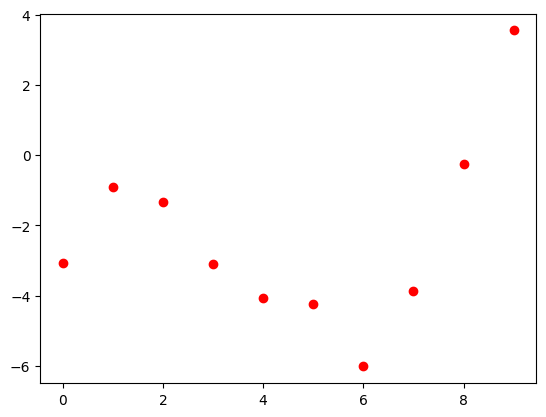

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,1)
y = np.array([-3.08, -0.90, -1.34, -3.10, -4.08, -4.24, -6.02, -3.87, -.25, 3.55])
plt.plot(x,y,'ro')
plt.show()

In [18]:
p_coefs = []
SSE = np.zeros(10)
for i,deg in enumerate(range(0,10)):
    p = np.polyfit(x,y,deg)
    p_coefs.append(p)
    yhat = np.polyval(p,x)
    SSE[i] = np.sum((yhat-y)**2)
SSE = SSE / 10

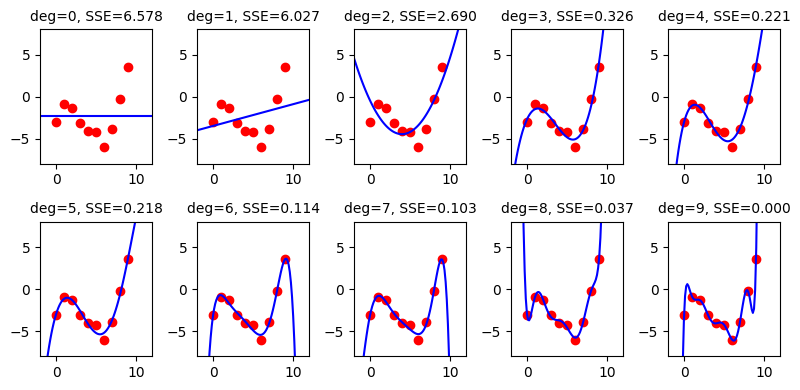

In [19]:
fig,ax = plt.subplots(2,5,figsize=(8, 4))
xi = np.linspace(-2,12,100)
for i,p in enumerate(p_coefs):
    plt.subplot(2, 5, i+1)
    plt.plot(x, y, 'ro')
    yi = np.polyval(p, xi)
    plt.plot(xi, yi, 'b-')
    plt.xlim((-2,12))
    plt.ylim((-8,8))
    plt.title(f"deg={i}, SSE={SSE[i]:.3f}", fontsize = 10)
    plt.tight_layout()

In [20]:
n = len(x)
SSE_cv = np.zeros(10)
for i in range(n):
    x_train = np.delete(x,i)
    y_train = np.delete(y,i)
    x_test = x[i]
    y_test = y[i]
    p_coefs = []
    for ix,deg in enumerate(range(0,10)):
        p = np.polyfit(x_train,y_train,deg)
        p_coefs.append(p)
        yhat = np.polyval(p,x_test)
        SSE_cv[ix] += np.sum((yhat-y_test)**2)
SSE_cv = SSE_cv / n

/var/folders/xc/_p3tnrwj5fv7spj_9b5jw6sm0000gn/T/ipykernel_22761/3121907839.py:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x_train,y_train,deg)
/var/folders/xc/_p3tnrwj5fv7spj_9b5jw6sm0000gn/T/ipykernel_22761/3121907839.py:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x_train,y_train,deg)
/var/folders/xc/_p3tnrwj5fv7spj_9b5jw6sm0000gn/T/ipykernel_22761/3121907839.py:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x_train,y_train,deg)
/var/folders/xc/_p3tnrwj5fv7spj_9b5jw6sm0000gn/T/ipykernel_22761/3121907839.py:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x_train,y_train,deg)
/var/folders/xc/_p3tnrwj5fv7spj_9b5jw6sm0000gn/T/ipykernel_22761/3121907839.py:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x_train,y_train,deg)
/var/folders/xc/_p3tnrwj5fv7spj_9b5jw6sm0000gn/T/ipykernel_22761/3121907839.py:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x_train,y_tra

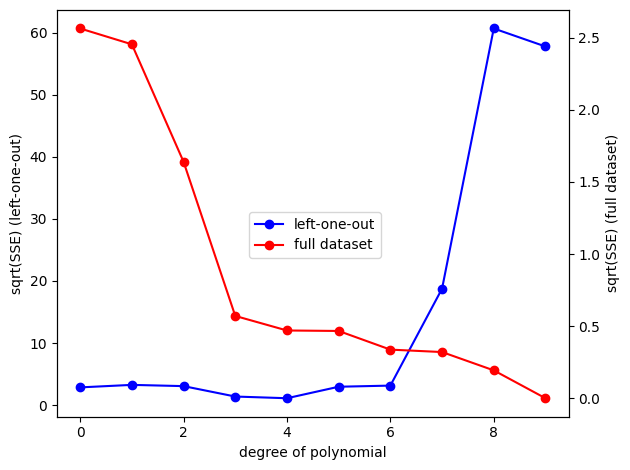

In [21]:
fig,ax = plt.subplots()
ax.plot(range(0,10),np.sqrt(SSE_cv),'bo-')
ax.set_xlabel("degree of polynomial")
ax.set_ylabel("sqrt(SSE) (left-one-out)")
ax2 = ax.twinx()
ax2.plot(range(0,10),np.sqrt(SSE),'ro-')
ax2.set_ylabel("sqrt(SSE) (full dataset)")
fig.legend(("left-one-out","full dataset"), loc="center")
fig.tight_layout()

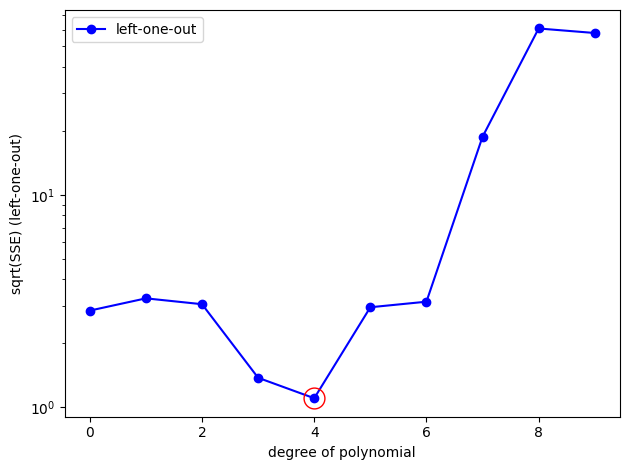

In [22]:
fig,ax = plt.subplots()
sse_plot = ax.semilogy(range(0,10),np.sqrt(SSE_cv),'bo-')
ax.semilogy(4,np.sqrt(SSE_cv[4]),'ro', markersize=15, markerfacecolor='none')
ax.set_xlabel("degree of polynomial")
ax.set_ylabel("sqrt(SSE) (left-one-out)")
ax.legend(sse_plot, ("left-one-out",""), loc="best")
fig.tight_layout()